# Intertemporal consumer problem

Team: M&M

Members: Markus Gorgone Larsen (hbk716) & Matias Bjørn Frydensberg Hall (pkt593)  

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
from types import SimpleNamespace
import sympy as sm
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject as mp

# Model description

We consider a standard **intertemporal consumer utility function in two periods** known from Macro II where:

* $C_t$ is consumption in period t
* $Y_t^L$ is labour income in period t
* $V_1$ is the intial wealth
* $T_t$ is lump sum tax payment in period t
* $\phi$ is the degree of impatience 
* $r$ is the real rental rate

all for $t\in\{1,2\}$  
We also have $C_t > 0$ and $\phi > 0$  

$$ U = u(C_1) + \frac{u(C_2)}{1+\phi}, \qquad u^{''} < 0 $$

Given **saving** in period 1 we can find **wealth in period 2**:

$$ V_2 = (1+r)\bigg(V_1+Y_1^L-T_1-C_1\bigg) = (1+r)S_1 $$

And **comsumption in period 2** becomes:

$$ C_2 = V_2 + Y_2^L - T_2 $$

Consolidating the two we get the **intertemporal budget constraint**:

$$C_1 + \frac{C_2}{1+r} = V_1+Y_1^L-T_1+\frac{Y_2^L-T_2}{1+r} $$

Inserting the expression for $C_2$ into the utility function we get:

$$ U = u(C_1) + \frac{u((1+r)(V_1+Y_1^L-T_1-C_1)+Y_2^L-T_2)}{1+\phi} $$

Assuming our consumer is risk averse we can use the following **utility function**:

$$ u(C_t) = lnC_t $$

Which gives us the following **maximisation problem** to solve:

$$ C_1^* = \text{arg}\max_{C_1} \, lnC_1 + \frac{ln((1+r)(V_1+Y_1^L-T_1-C_1)+Y_2^L-T_2)}{1+\phi} $$

Further more we know from solving the model analytical that the solution must satisfy:

$$ u'(C_1) = \frac{1+r}{1+\phi}u'(C_2) $$

# Algorithm

Given the model above we can now describe our algorithm:  

**Problem:** Solve the maximisation problem above  
**Inputs:** The variables mentioned above  
**Outputs:** $C_1, \, C_2, \, U$  
**Algorithm:** `U_optimize()`
  * Use scipy to numerically optimize U given parameters


# Solving the model

For simplicity, we assume that income is the same in both periods. We set the level of impatience and rental rate equal to each other and close to zero, as the rental rate is close to zero right now. The initial endowment is also picked arbitrarily. Our above stated theory says that consumption must be the same in both periods with the following parameters.

In [2]:
# a. Create simplenamespace and set parameter values

par = SimpleNamespace()

par.r = 0.02
par.V_1 = 5
par.Y_L1 = 2
par.Y_L2 = 2
par.T_1 = 0.5
par.T_2 = 0.5
par.phi = 0.02

# b. Compute optimal housing quality, consumption and utility
c_1star, c_2star, u_star = mp.u_optimise(par)

# c. Print solution
print(f'The agent will choose optimal consumption in period 1 = {c_1star:.2f}, which implies optimal consumption in period 2 = {c_2star:.2f} and utility = {u_star:.3f}')


The agent will choose optimal consumption in period 1 = 4.02, which implies optimal consumption in period 2 = 4.02 and utility = 2.758


Our computation is what we could expect, as the consumer has no preference for consumption in one of the two periods, as the rental rate equals the level of impatience. We infer that the result is correct. Now we will get to the visualising of the results.

# Visualising consumption in both periods

For visualising the results we will show how consumption in the two periods varies with income levels. We will also take a look at utility.

Our method for visualising in 2d will be the following:

1. Create array with relevant variable we want to change
2. Create empty containers for $C_1$, $C_2$ and U
3. Maximise U looping over the array and save values of $C_1$, $C_2$ and U in containers
4. Plot the findings

We have created a function that does the first 2 out of 4 steps. We will start with income:

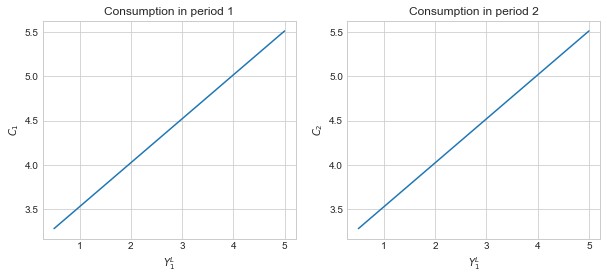

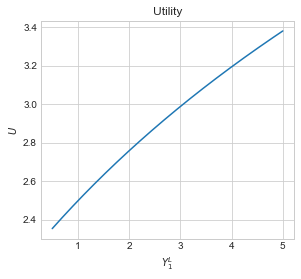

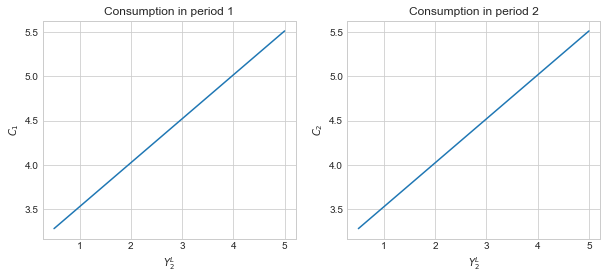

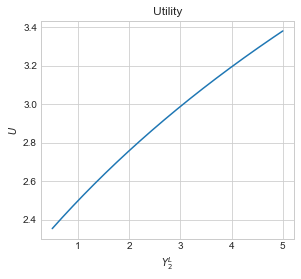

In [3]:
# a. Set number of objects and create array of Y_L1's/Y_L2's and container for C_1*, C_2* and U*
par.N = 1000

Y_L1_vec, c1_vec, c2_vec, u_vec = mp.array(0.5,5, par.N)
Y_L2_vec, c1_vec, c2_vec, u_vec = mp.array(0.5,5, par.N)
# b. Loop the optimise function over the Y_Lt_vec arrays
for i in range(par.N):
    par.Y_L1 = Y_L1_vec[i]
    c1_vec[i], c2_vec[i], u_vec[i] = mp.u_optimise(par)

par.Y_L1 = 2

for i in range(par.N):
    par.Y_L2 = Y_L2_vec[i]
    c1_vec[i], c2_vec[i], u_vec[i] = mp.u_optimise(par)

par.Y_L2 = 2
    
# c. Create graphs and plot
mp.two_figures(Y_L1_vec, c1_vec, "Consumption in period 1", "$Y^L_1$", "$C_1$", Y_L1_vec, c2_vec, "Consumption in period 2", "$Y^L_1$", "$C_2$")
mp.one_figure(Y_L1_vec, u_vec, "Utility", "$Y^L_1$", "$U$")

mp.two_figures(Y_L2_vec, c1_vec, "Consumption in period 1", "$Y^L_2$", "$C_1$", Y_L2_vec, c2_vec, "Consumption in period 2", "$Y^L_2$", "$C_2$")
mp.one_figure(Y_L2_vec, u_vec, "Utility", "$Y^L_2$", "$U$")

Above we se that both utility curves are concave. This is due to the specification of the utility function. We also see not suprisingly that when labour income increases, consumption in both periods go up. We know that an increase in the labour income in period 1 increases overall income slightly more due to the rental rate. But as we see above it doesn't have a noticeable effect on utility or consumption. This however, could just be a consequence of the low rental rate.

# How the rental rate and impatience affect allocation

Now we would like to show how varying degrees of impatience influence consumption in both periods. Likewise we would like to illustrate how different levels of rental rates affect consumption in both periods. Our method is going to be the same as described above.  
Let's start with patience:

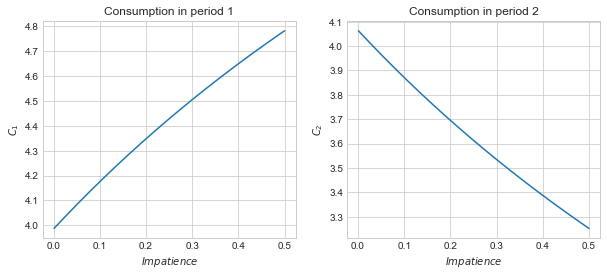

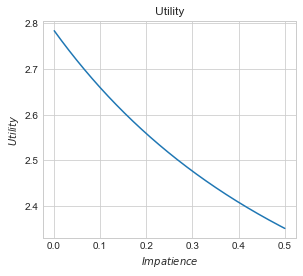

In [4]:
# a. Create array of phi's and container for C_1*, C_2* and U*
phi_vec, c1_vec, c2_vec, u_vec = mp.array(0.001, 0.5, par.N)

# b. Loop the optimise function over the phi_vec array
for i in range(par.N):
    par.phi = phi_vec[i]
    c1_vec[i], c2_vec[i], u_vec[i] = mp.u_optimise(par)

# c. Create graph and plot
mp.two_figures(phi_vec, c1_vec, "Consumption in period 1", "$Impatience$", "$C_1$", phi_vec, c2_vec, "Consumption in period 2", "$Impatience$", "$C_2$")
mp.one_figure(phi_vec, u_vec, "Utility", "$Impatience$", "$Utility$")

# d. Reset phi
par.phi = 0.02

Hence we find that when the level of impatience increases, consumption in period 1 increases while it decreases in period 2(not suprising), while the overall utility falls. This is a consequense of the concave utility functions, why the increased consumption in period 1 can't fully compensate for the drop in consumption in period 2. 
Next we turn to the rental rate:

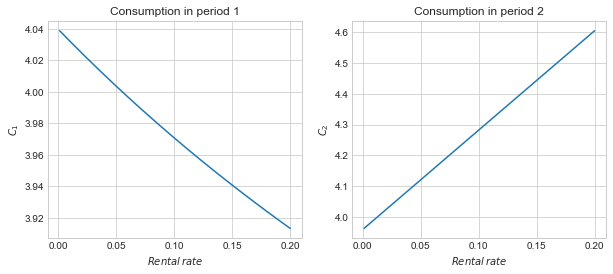

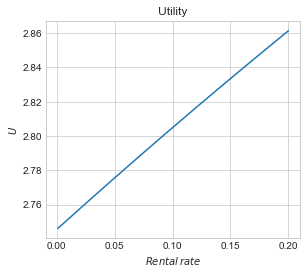

In [5]:
# a. Create array of r's and container for C_1*, C_2* and U*
r_vec, c1_vec, c2_vec, u_vec = mp.array(0.001,0.2, par.N)

# b. Loop the optimise function over the r_vec array
for i in range(par.N):
    par.r = r_vec[i]
    c1_vec[i], c2_vec[i], u_vec[i] = mp.u_optimise(par)

# c. Create graph and plot
mp.two_figures(r_vec, c1_vec, "Consumption in period 1", "$Rental \: rate$", "$C_1$", r_vec, c2_vec, "Consumption in period 2", "$Rental \: rate$", "$C_2$")
mp.one_figure(r_vec, u_vec, "Utility", "$Rental \: rate$", "$U$")

# d. Reset r
par.r = 0.02

Above we see that consumption in period 1 is decreasing in r while consumption in period 2 is increasing, why we have that the substitution effect dominates the income effect. We also see that utility is increasing in the rental rate which is because of direct postive income effect a higher rental rate has.

An interesting point to visualize is the combined effects of the rental rate and impatience on utility. We therefore set up a 3D function, where the combinations $r$ and $\phi$ are visualized.

In [10]:
#To create the 3D graph, we first create our variables to input. 
#We need three for the 3-dimensional space, who all need to be 2-dimensional
N = 100 
shape_tuple = (N,N)
r_values = np.empty(shape_tuple)
phi_values = np.empty(shape_tuple)
u_values = np.empty(shape_tuple)

#After creating our empty tuples, we can now begin insert values into them.
#We run our optimization function for every combination of phi and r that exists between 0 and 1 with two decimals.

for i in range(N):
        for j in range(N):
            par.r = i/100
            par.phi = j/100
            r_values[i,j] = par.r
            phi_values[i,j] = par.phi
            c1, c2, u = mp.u_optimise(par)
            u_values[i,j] = u
    
#We now have our three filled tuples, we now can plot them together. 
#We use a widget here for better visualization. 
#NOTE: Rerun all cells to see the widget. 
%matplotlib widget
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(phi_values,r_values, u_values, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('$\phi$')
ax.set_ylabel('$r$')
ax.set_zlabel('$U$')
ax.set_title('Utility for values of $\phi$ and $r$'); 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

As we can see in the above graph, we come to the same conclusion as with our 2D graphs. Impatience decreases the overall utility for any given value of the rental rate, while the rental rate increases utility for any given rate of the impatience. We see that the maximum utility given that impatience and the rental rate would be non-fixed is the point, where the consumer has "limitless patience" and the rental rate is as high as it can get.

# Incorporating risk into the baseline model

As an extension to out model we will give the consumer an option of a risk bearing asset, while stile having the option to invest in the risk free assest, which is the equivilent of the rental rate in the baseline model.  
The **risky asset**, $R$, give an expected return of:

$$ E[R] = \beta*(1+r_{rb}) + (1-\beta)*0, \quad 0 < \beta < 1$$

While the expected return of the **risk-free assest**, $RF$, is:

$$ E[RF] = 1 + r_{rf} $$

Why the expected utility function becomes:

$$ E[U] =  u(C_1) + \frac{E[u(C_2)]}{1+\phi}, \qquad u^{''} < 0 $$

We also set the percentage of the savings used on the risk free asset equal to $\alpha$  
Now given **saving** in period 1 as defined earlier we can find **wealth in period 2**: 
$$
\begin{aligned}
V_2 &= \begin{cases} \alpha(1+r_{rf})S_{1} + \left(1-\alpha\right)\left(1+r_{rb}\right)* S_{1} & \text{with probability} \; \beta \\
\alpha(1+r_{rf})S_{1} & \text{with probability} \; 1-\beta
\end{cases}
\end{aligned}
$$

And **utility in period 2** becomes:

$$
\begin{aligned}
u(C_2) &= \begin{cases} ln\bigg(\alpha(1+r_{rf})S_{1} + \left(1-\alpha\right)\left(1+r_{rb}\right)* S_{1}+Y_2^L-T_2\bigg) & \text{with probability} \; \beta \\
ln\bigg(\alpha(1+r_{rf})S_{1}+Y_2^L-T_2\bigg) & \text{with probability} \; 1-\beta
\end{cases}
\end{aligned}
$$
With this new addition to our model the **new intertemporal budget constraint** in **good times** becomes:

$$ C_1 + \frac{C_2}{\alpha(1+r_{rf})+(1-\alpha)(1+r_{rb})} = V_1 + Y_1^L - T_1 + \frac{1}{\alpha(1+r_{rf})+(1-\alpha)(1+r_{rb})}(Y_2^L-T_2) $$

And in **bad times**:

$$ C_1 + \frac{C_2}{\alpha(1+r_{rf}))} = V_1 + Y_1^L - T_1 + \frac{1}{\alpha(1+r_{rf})}(Y_2^L-T_2) $$  

Why we are going to bound $C_1$ according to the minimum of those two for $C_2 = 0$

The new **new maximisation problem in expectation** becomes:

$$ C_1^*, \alpha^* = \text{arg}\max_{C_1, \, \alpha} \, ln(C_1) + \frac{\beta*\bigg(ln\left(\alpha(1+r_{rf})(V_1+Y_1^L-T_1-C_1)+(1-\alpha)(1+r_{rb})(V_1+Y_1^L-T_1-C_1)+Y_2^L-T_2\right)\bigg)+(1-\beta)*\bigg(ln\left(\alpha(1+r_{rf}(V_1+Y_1^L-T_1-C_1)\right)\bigg)}{1+\phi} \quad st. 0 \leq \alpha \leq 1$$

Now we can begin to solve the model using a similar method as before. The functions are defined in our .py file.

We have defined the excisting variables as before, and given the risk bearing asset a return of 10%, reflecting the 8% risk-premium we observe empirically. We set $\beta$ at 95% as we observe the good state most of the time. At last we guess $\alpha = 0.8$ as our agent is risk-averse she will put most of the investment in the risk free asset.

In [7]:
# a. Create simplenamespace and set parameter values

par_ext = SimpleNamespace()

par_ext.r_rf = 0.02
par_ext.r_rb = 0.1
par_ext.V_1 = 5
par_ext.Y_L1 = 2
par_ext.Y_L2 = 2
par_ext.T_1 = 0.5
par_ext.T_2 = 0.5
par_ext.phi = 0.02
par_ext.alpha = 0.8
par_ext.beta = 0.95

# b. Compute optimal housing quality, consumption and utility
c_1star, c_2star_good, c_2star_bad, alpha_star, u_star = mp.u_optimise_ext(par_ext)

# c. Print solution
print(f'The agent will choose optimal consumption in period 1 = {c_1star:.2f}, which will give the agent optimal consumption in period 2 in the good state = {c_2star_good:.2f} \
and in the bad state = {c_2star_bad:.2f} giving her expected utility = {u_star:.3f}. The risk averse agent will pick alpha = {alpha_star:.2f}')

The agent will choose optimal consumption in period 1 = 4.02, which will give the agent optimal consumption in period 2 in the good state = 4.12 and in the bad state = 2.77 giving her expected utility = 2.762. The risk averse agent will pick alpha = 0.50


Hence when the agent is given the option of a risky asset and optimises utility in expectation, she gets a minor increase in utility. Now we would like to compare the extension to the baseline model comparing utility and choices of consumption in period 1 across $r_{rb}$ and $\beta$ values.

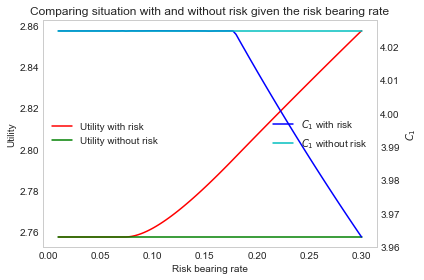

In [8]:
#Step 1: Removing widget
%matplotlib inline

# a. Setting number of observation in array's N, also create array of r_rb's and container for C_1* and U* and an empty list
N = 100
r_rb_vec = np.linspace(0.01, 0.3, N)
C_1_vec_ext = np.zeros(N)
U_vec_ext = np.zeros(N)
out = []

# b. Loop the optimise function over the r_vec array
for i in range(N):
    par_ext.r_rb = r_rb_vec[i]
    out = mp.u_optimise_ext(par_ext)
    C_1_vec_ext[i] = out[0]
    U_vec_ext[i] = out[4]

# c. setting par_ext.r equal to par_ext.r_rf and create arrays without risk

par_ext.r = par_ext.r_rf
c_1star_base, c_2star_base, u_star_base = mp.u_optimise(par_ext)
U_vec_base = np.full(100, u_star_base)
C_1_vec_base = np.full(100, c_1star_base)

# d. Create graph and plot

fig, ax1 = plt.subplots()

ax1.set_title('Comparing situation with and without risk given the risk bearing rate')
ax1.set_xlabel('Risk bearing rate')
ax1.set_ylabel('Utility')
ax1.plot(r_rb_vec, U_vec_ext, color='r', label='Utility with risk')
ax1.plot(r_rb_vec, U_vec_base, color='g', label='Utility without risk')
ax1.grid(False)
ax1.legend(loc='center left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('$C_1$')
ax2.plot(r_rb_vec, C_1_vec_ext, color='b', label='$C_1$ with risk')
ax2.plot(r_rb_vec, C_1_vec_base, color='c', label='$C_1$ without risk')
ax2.grid(False)
ax2.legend(loc='center right')

fig.tight_layout()


# e. Reset r_rb
par_ext.r_rb = 0.1


As we see above, $\alpha$ will start to decrease around $r_rb = 0.08$ as seen by the increase in utility, while consumption in period 1 starts to drop at $r_rb = 0.18$. So in the beginning the increase in utility is due only to the changing of the agents portfolio from risk-free to risk bearing. After the whole portfolio consists of risk bearing assets the agent starts to save more, why consumption in period 1 falls. Next let's look at the $\beta$ values, or the chance of being in a good state.

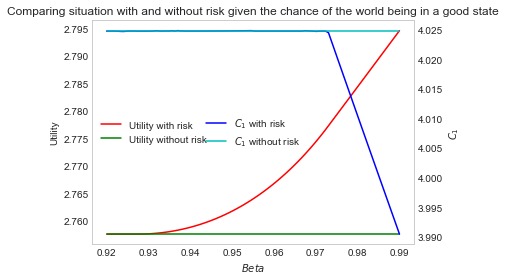

In [9]:
# a. Setting number of observation in array's N, also create array of beta's and container for C_1* and U* and an empty list
N = 100
beta_vec = np.linspace(0.92, 0.99, N)
C_1_vec_ext = np.zeros(N)
U_vec_ext = np.zeros(N)
out = []

# b. Loop the optimise function over the r_vec array
for i in range(N):
    par_ext.beta = beta_vec[i]
    out = mp.u_optimise_ext(par_ext)
    C_1_vec_ext[i] = out[0]
    U_vec_ext[i] = out[4]

# c. setting par_ext.r equal to par_ext.r_rf and create arrays without risk

par_ext.r = par_ext.r_rf
c_1star_base, c_2star_base, u_star_base = mp.u_optimise(par_ext)
U_vec_base = np.full(100, u_star_base)
C_1_vec_base = np.full(100, c_1star_base)

# d. Create graph and plot

fig, ax1 = plt.subplots()

ax1.set_title('Comparing situation with and without risk given the chance of the world being in a good state')
ax1.set_xlabel('$Beta$')
ax1.set_ylabel('Utility')
ax1.plot(beta_vec, U_vec_ext, color='r', label='Utility with risk')
ax1.plot(beta_vec, U_vec_base, color='g', label='Utility without risk')
ax1.grid(False)
ax1.legend(loc='center left')

ax2 = ax1.twinx()

ax2.set_ylabel('$C_1$')
ax2.plot(beta_vec, C_1_vec_ext, color='b', label='$C_1$ with risk')
ax2.plot(beta_vec, C_1_vec_base, color='c', label='$C_1$ without risk')
ax2.grid(False)
ax2.legend(loc='center')

fig.tight_layout()

# e. Reset beta
par_ext.beta = 0.95

As seen above, we see that utility starts to rise around $\beta = 0.93$ which means that $\alpha$ starts to rise around that value, meaning our agent won't take a risk unless it pays of more than 93% of the time. We also see that $C_1$ starts to decrease at around $\beta = 0.97$ which is the point where $\alpha = 0$ and the agent therefore starts substituting consumption from period 1 towards period 2 to take advantage of the reduced risks.

# Conclusion

In this assignment we have started with an two-period intertemporal consumer utility function and attempted to solve the maximisation problem presented using u_optimize in the scipy package. We have then attempted to chart the deeper mechanics of the model by visualizing how the model responds to changes in income levels across the two periods. We found that consumption is very obviously improved by increased income, with a slighty bigger increase when the income rises in period 1. We have then visualized how the rental rate and impatience affects consumption and utility, finding that impatience decreases overall utility by consuming more in period 1, thereby removing some benefit from the rental rate. The rental rate increases the overall utility by consuming more in period 2. We also showed how different combinations of impatience and the rental rate affect utility, giving us the same conclusions as before. Lastly, we extent our model to encompass risk through risk-free and risky assets that also changes the consumer's behavior, we see both how affecting $\beta$ the risk of the risky asset, and the return of the risky asset affect decisions and utility of our agent.

Further extensions to the model could be changing the utility function to be able to vary the degree of risk aversion. We could also have modelled labour, making the consumer have a choice between labour and freetime. To make the model more realistic the tax could also be calculated from a constant tax rate based on the labour income, instead of being lump sum. Also, simulating our extension model could reveal if the agent would get the same utility as in expectation.